In [2]:
from dotenv import load_dotenv
import numpy as np 
import requests 
import pandas as pd
from helpers import api_data_fetcher
import os
import importlib

importlib.reload(api_data_fetcher)

## Load environment variables from .env file
load_dotenv()

kiln_api_key = os.getenv("kiln_api_key")
kiln_host = os.getenv("kiln_host")



In [270]:
# Fetch kiln validators from kiln /stakes API

stakes_base_url = f"{kiln_host}/v1/eth/stakes"

params = {
    "scope": "kiln",
    "page_size": 100
}

headers = {"Authorization": f"Bearer {kiln_api_key}"}
res = api_data_fetcher.fetch_all_pages(stakes_base_url, params, headers, "kiln_stakes.csv")


/Users/jamesgomatos/Desktop/Kiln-Project/helpers/api_data_fetcher.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.DataFrame(payload["data"])


Data fetched from https://api.testnet.kiln.fi/v1/eth/stakes and saved to kiln_stakes.csv


In [5]:

# Fetch non-kiln validators from kiln /stakes API
stakes_base_url = f"{kiln_host}/v1/eth/stakes"

params = {
    "scope": "network",
    "page_size": 100
}


headers = {"Authorization": f"Bearer {kiln_api_key}"}
non_kiln_validators = api_data_fetcher.fetch_all_non_kiln_validators(stakes_base_url, params, headers, "non-kiln-validators.csv", 10)
print(f"Loaded and sampled {len(non_kiln_validators)} non-Kiln validators from CSV")


/Users/jamesgomatos/Desktop/Kiln-Project/helpers/api_data_fetcher.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(payload["data"])])


Fetching page 2 of 10
Fetching page 3 of 10
Fetching page 4 of 10
Fetching page 5 of 10
Fetching page 6 of 10
Fetching page 7 of 10
Fetching page 8 of 10
Fetching page 9 of 10
Fetching page 10 of 10
Data fetched from https://api.testnet.kiln.fi/v1/eth/stakes and saved to non-kiln-validators.csv
Loaded and sampled 996 non-Kiln validators from CSV


In [3]:
# load the validators csv file into a pandas dataframe
kiln_validators = pd.read_csv("kiln_stakes.csv")
kiln_validators = kiln_validators[kiln_validators["state"] == "active_ongoing"]
print(kiln_validators.shape)
# get sample of kiln validators 
sampled_kiln_validators= kiln_validators.sample(n=min(150, kiln_validators.shape[0]))
print(f"Loaded and sampled {len(sampled_kiln_validators)} Kiln validators from CSV")
print(sampled_kiln_validators.shape)

(6895, 28)
Loaded and sampled 150 Kiln validators from CSV
(150, 28)


In [6]:
# load sample of non-kiln validators 
non_kiln_validators = pd.read_csv('non-kiln-validators.csv')
non_kiln_validators = non_kiln_validators[non_kiln_validators["state"] == "active_ongoing"]
print(non_kiln_validators.shape)
sampled_non_kiln_validators = non_kiln_validators.sample(n=min(150, non_kiln_validators.shape[0]))
print(f"Loaded and sampled {len(sampled_non_kiln_validators)} non-Kiln validators from CSV") 
print(sampled_non_kiln_validators.shape)

(936, 27)
Loaded and sampled 150 non-Kiln validators from CSV
(150, 27)


In [7]:
importlib.reload(api_data_fetcher)
kiln_validators_with_apy = api_data_fetcher.calculate_apys(sampled_kiln_validators)
non_kiln_validators_with_apy = api_data_fetcher.calculate_apys(sampled_non_kiln_validators)


In [8]:
kiln_validators_with_apy.head()

,validator_address,validator_index,state,activated_at,activated_epoch,delegated_at,delegated_block,exited_at,exited_epoch,deposit_tx_sender,...,estimated_next_skimming_at,activation_eligibility_epoch,activation_eligibility_at,exit_requested,effective_balance_eth,consensus_rewards_eth,execution_rewards_eth,total_rewards_eth,cl_apy,el_apy
3181,0x96b712fc2ec4ae8b1d6021cd591450940a34915b4e6a...,1637201.0,active_ongoing,2024-04-01T08:48:00Z,41820.0,2024-03-27T19:18:00Z,1228497,NaN,NaN,0x7fF0B7D8b99E4cD685355A786B6ad5287B6552C1,...,2024-07-09T03:19:48Z,40945.0,2024-03-28T11:28:00Z,NaN,32.0,0.192114,0.001866,0.193980,2.048468,0.019902
1431,0x8a8dd29dddba567d5fe2335b1f956b10b0d20e90d79e...,1634460.0,active_ongoing,2024-03-30T20:19:12Z,41478.0,2024-03-27T18:21:12Z,1228238,NaN,NaN,0x7fF0B7D8b99E4cD685355A786B6ad5287B6552C1,...,2024-07-09T02:45:36Z,40939.0,2024-03-28T10:49:36Z,NaN,32.0,0.150177,0.000000,0.150177,1.578869,0.000000
2796,0x93f524a46e0b1ed20317860810cb7754e24ad4e0af7e...,1635359.0,active_ongoing,2024-03-31T08:16:00Z,41590.0,2024-03-27T18:40:24Z,1228325,NaN,NaN,0x7fF0B7D8b99E4cD685355A786B6ad5287B6552C1,...,2024-07-09T02:56:48Z,40941.0,2024-03-28T11:02:24Z,NaN,32.0,0.145235,0.000000,0.145235,1.533951,0.000000
1555,0x8b77da4d222624e813a4c9a7fee4f320c6166f6c8620...,1638719.0,active_ongoing,2024-04-02T05:04:00Z,42010.0,2024-03-27T19:49:00Z,1228639,NaN,NaN,0x7fF0B7D8b99E4cD685355A786B6ad5287B6552C1,...,2024-07-09T03:38:48Z,40949.0,2024-03-28T11:53:36Z,NaN,32.0,0.146279,0.000000,0.146279,1.572155,0.000000
4755,0xa83759ebf06885c25f264752eee811de35281232781d...,1633102.0,active_ongoing,2024-03-30T02:11:12Z,41308.0,2024-03-27T17:17:48Z,1227937,NaN,NaN,0x7fF0B7D8b99E4cD685355A786B6ad5287B6552C1,...,2024-07-09T02:28:36Z,40936.0,2024-03-28T10:30:24Z,NaN,32.0,0.203080,0.008734,0.211814,2.120287,0.091193


In [9]:
non_kiln_validators_with_apy.head()

,validator_address,validator_index,state,activated_at,activated_epoch,delegated_at,delegated_block,exited_at,exited_epoch,deposit_tx_sender,...,estimated_next_skimming_slot,estimated_next_skimming_at,activation_eligibility_epoch,activation_eligibility_at,effective_balance_eth,consensus_rewards_eth,execution_rewards_eth,total_rewards_eth,cl_apy,el_apy
181,0x800134d9f18161371bd3e7917769a36a02bf6a24f590...,816959,active_ongoing,2023-09-28T12:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,2036141.0,2024-07-07T07:08:12Z,NaN,NaN,32.0,0.413545,0.001399,0.414944,1.610219,0.005449
378,0x8002dee506258e72ad2a4e9dd46f4c5d5016e48fced0...,862747,active_ongoing,2023-09-28T12:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,2039002.0,2024-07-07T16:40:24Z,NaN,NaN,32.0,0.487627,0.000349,0.487976,1.898670,0.001358
704,0x800554e117f5f1ccc298fcd60f01d2079d728ea2005c...,1258648,active_ongoing,2023-09-28T12:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.0,0.429257,0.000000,0.429257,1.671390,0.000000
506,0x8003dfb571052409eb45f209597b77afa8e1b483a4f8...,458394,active_ongoing,2023-09-28T12:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.0,0.083960,0.000000,0.083960,0.326913,0.000000
994,0x80076011253a2d12a7bbf4b22e353a5b8e674526a218...,1729218,active_ongoing,2024-06-14T23:18:24Z,58606.0,2024-06-14T06:14:24Z,1732374.0,NaN,NaN,0xff9E47B2EBc22eFA1c680dcd2935872467E5625E,...,2018472.0,2024-07-04T20:14:24Z,58597.0,2024-06-14T22:20:48Z,32.0,0.044754,0.000000,0.044754,1.572045,0.000000


In [10]:
non_kiln_results =  api_data_fetcher.calculate_overall_apys(non_kiln_validators_with_apy)
kiln_results =  api_data_fetcher.calculate_overall_apys(kiln_validators_with_apy)

# Print results
print("Kiln Validators:")
print(f"Average gross APY: {kiln_results['avg_gross_apy']:.4f}%")
print(f"Average CL APY: {kiln_results['avg_cl_apy']:.4f}%")
print(f"Average EL APY: {kiln_results['avg_el_apy']:.4f}%")

print("\nNon-Kiln Validators:")
print(f"Average gross APY: {non_kiln_results['avg_gross_apy']:.4f}%")
print(f"Average CL APY: {non_kiln_results['avg_cl_apy']:.4f}%")
print(f"Average EL APY: {non_kiln_results['avg_el_apy']:.4f}%")

# Compare the values
print("\nComparison:")
print(f"Gross APY difference: {kiln_results['avg_gross_apy'] - non_kiln_results['avg_gross_apy']:.4f}%")
print(f"CL APY difference: {kiln_results['avg_cl_apy'] - non_kiln_results['avg_cl_apy']:.4f}%")
print(f"EL APY difference: {kiln_results['avg_el_apy'] - non_kiln_results['avg_el_apy']:.4f}%")

# Additional analysis
print("\nAdditional Statistics:")
print("Kiln Validators:")
print(kiln_validators_with_apy[['gross_apy', 'cl_apy', 'el_apy']].describe())
print("\nNon-Kiln Validators:")
print(non_kiln_validators_with_apy[['gross_apy', 'cl_apy', 'el_apy']].describe())


Kiln Validators:
Average gross APY: 1.9526%
Average CL APY: 1.9038%
Average EL APY: 0.0488%

Non-Kiln Validators:
Average gross APY: 1.6340%
Average CL APY: 1.6069%
Average EL APY: 0.0270%

Comparison:
Gross APY difference: 0.3186%
CL APY difference: 0.2969%
EL APY difference: 0.0217%

Additional Statistics:
Kiln Validators:
        gross_apy      cl_apy      el_apy
count  150.000000  150.000000  150.000000
mean     1.952598    1.903841    0.048757
std      0.609705    0.550957    0.099313
min      1.499291    1.499291    0.000000
25%      1.570839    1.570839    0.000000
50%      1.577442    1.577442    0.000000
75%      2.199299    2.133953    0.051667
max      4.587531    4.266273    0.404508

Non-Kiln Validators:
        gross_apy      cl_apy      el_apy
count  150.000000  150.000000  150.000000
mean     1.633987    1.606949    0.027039
std      0.908911    0.879385    0.100725
min     -1.449605   -1.449605    0.000000
25%      1.446165    1.442849    0.000000
50%      1.670705    

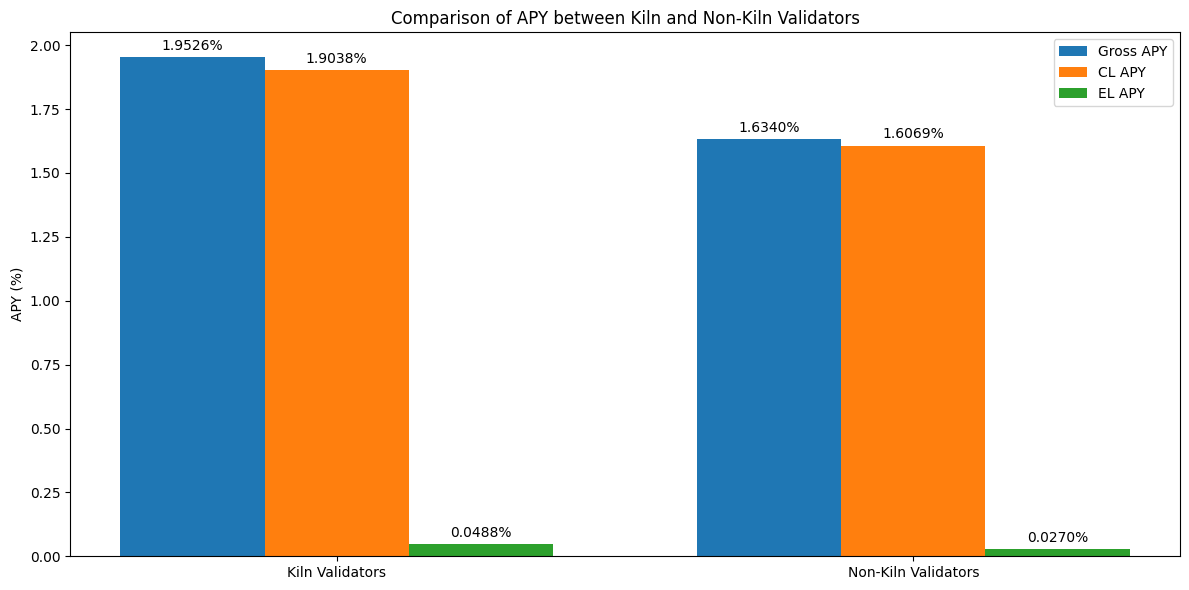

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
validator_types = ['Kiln Validators', 'Non-Kiln Validators']
gross_apy = [kiln_results['avg_gross_apy'], non_kiln_results['avg_gross_apy']]
cl_apy = [kiln_results['avg_cl_apy'], non_kiln_results['avg_cl_apy']]
el_apy = [kiln_results['avg_el_apy'], non_kiln_results['avg_el_apy']]

# Set up the bar chart
x = np.arange(len(validator_types))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bars1 = ax.bar(x - width, gross_apy, width, label='Gross APY', color='#1f77b4')
bars2 = ax.bar(x, cl_apy, width, label='CL APY', color='#ff7f0e')
bars3 = ax.bar(x + width, el_apy, width, label='EL APY', color='#2ca02c')

# Customize the chart
ax.set_ylabel('APY (%)')
ax.set_title('Comparison of APY between Kiln and Non-Kiln Validators')
ax.set_xticks(x)
ax.set_xticklabels(validator_types)
ax.legend()

# Add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [14]:
network_stats_url = kiln_host + "/v1/eth/network-stats"
kiln_stats_url = kiln_host + "/v1/eth/kiln-stats"

# Headers for API requests
headers = {
    "Authorization": f"Bearer {kiln_api_key}",
    "Content-Type": "application/json"
}

def fetch_data(url):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data from {url}: {response.status_code}")
        return None

# Fetch data
network_stats = fetch_data(network_stats_url)
kiln_stats = fetch_data(kiln_stats_url)

print(network_stats)
print(kiln_stats)

# Extract relevant data
if network_stats and kiln_stats:
    network_apy = network_stats['data']['network_gross_apy']
    kiln_apy_last_1d = kiln_stats['data']['last_1d']
    kiln_apy_last_7d = kiln_stats['data']['last_7d']
    kiln_apy_last_30d = kiln_stats['data']['last_30d']
    # Create a DataFrame for comparison
    data = {
        'Category': ['Overall Network', 'Kiln Network', 'Sampled Kiln', 'Sampled Non-Kiln'],
        'APY': [network_apy, kiln_apy, sampled_kiln_apy, sampled_non_kiln_apy]
    }
    df = pd.DataFrame(data)

    # Calculate differences
    df['Difference from Network'] = df['APY'] - network_apy
    df['Difference from Kiln'] = df['APY'] - kiln_apy

    # Display results
    print(df)

    # Visualization
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df['Category'], df['APY'], color=['blue', 'green', 'orange', 'red'])
    plt.title('Comparison of Validator Performance')
    plt.xlabel('Validator Category')
    plt.ylabel('APY (%)')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Analysis
    print("\nAnalysis:")
    print(f"1. The overall network APY is {network_apy:.2f}%")
    print(f"2. The Kiln network APY is {kiln_apy:.2f}%")
    print(f"3. Kiln outperforms the overall network by {kiln_apy - network_apy:.2f} percentage points")
    print(f"4. Sampled Kiln validators underperform the Kiln network by {kiln_apy - sampled_kiln_apy:.2f} percentage points")
    print(f"5. Sampled non-Kiln validators underperform the overall network by {network_apy - sampled_non_kiln_apy:.2f} percentage points")
    print(f"6. In our sample, Kiln validators outperform non-Kiln validators by {sampled_kiln_apy - sampled_non_kiln_apy:.2f} percentage points")

{'data': {'network_gross_apy': 3.4417669061281195, 'supply_staked_percent': 27.520571643634128, 'updated_at': '2024-07-17T08:31:08Z', 'estimated_entry_time_seconds': 167664, 'estimated_exit_time_seconds': 25056, 'estimated_withdrawal_time_seconds': 1250708.25, 'eth_price_usd': 3446.7658893041}}
{'data': {'gross_apy': {'last_1d': 2.008990526199341, 'last_7d': 1.9589486292430334, 'last_30d': 2.096239229043325}, 'updated_at': '2024-07-17'}}


'\n# Extract relevant data\nif network_stats and kiln_stats:\n    network_apy = network_stats[\'data\'][\'network_gross_apy\']\n    kiln_apy = kiln_stats[\'data\'][\'network_gross_apy\']\n\n    # Create a DataFrame for comparison\n    data = {\n        \'Category\': [\'Overall Network\', \'Kiln Network\', \'Sampled Kiln\', \'Sampled Non-Kiln\'],\n        \'APY\': [network_apy, kiln_apy, sampled_kiln_apy, sampled_non_kiln_apy]\n    }\n    df = pd.DataFrame(data)\n\n    # Calculate differences\n    df[\'Difference from Network\'] = df[\'APY\'] - network_apy\n    df[\'Difference from Kiln\'] = df[\'APY\'] - kiln_apy\n\n    # Display results\n    print(df)\n\n    # Visualization\n    plt.figure(figsize=(12, 6))\n    bars = plt.bar(df[\'Category\'], df[\'APY\'], color=[\'blue\', \'green\', \'orange\', \'red\'])\n    plt.title(\'Comparison of Validator Performance\')\n    plt.xlabel(\'Validator Category\')\n    plt.ylabel(\'APY (%)\')\n    plt.xticks(rotation=45, ha=\'right\')\n\n    # Add v

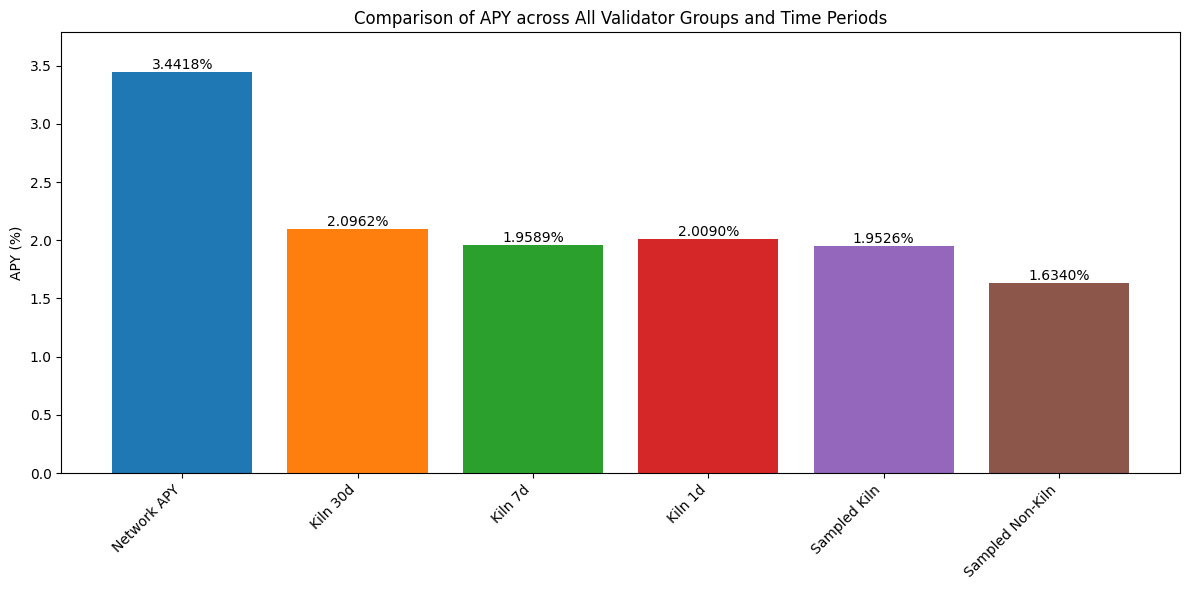

In [17]:

# Create a  graph to compare all APYs
plt.figure(figsize=(12, 6))

all_labels = ['Network APY', 'Kiln 30d', 'Kiln 7d', 'Kiln 1d', 'Sampled Kiln', 'Sampled Non-Kiln']
all_values = [overall_network_apy, kiln_df['last_30d'][0], kiln_df['last_7d'][0], 
              kiln_df['last_1d'][0], sampled_kiln_apy, sampled_non_kiln_apy]

bars = plt.bar(all_labels, all_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Comparison of APY across All Validator Groups and Time Periods')
plt.ylabel('APY (%)')
plt.ylim(0, max(all_values) * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}%',
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ... (keep the previous comparison analysis code) ...

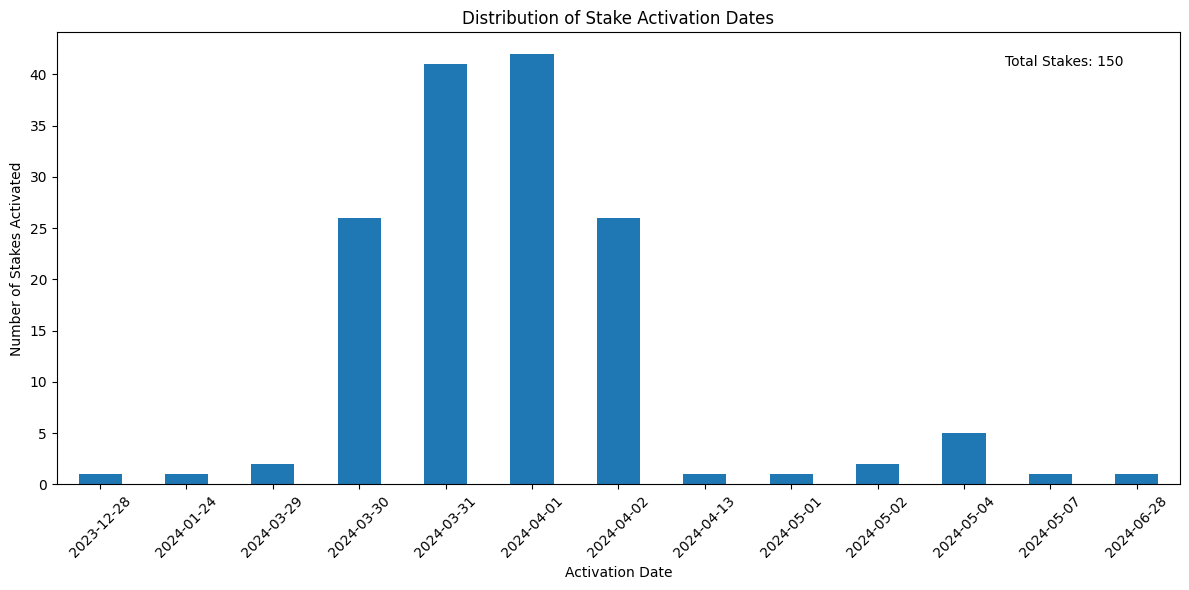

Total number of stakes: 150
Date range: 2023-12-28 to 2024-06-28
Date with most activations: 2024-04-01 (42 activations)


In [20]:
from datetime import datetime

def plot_stake_activations(df):
    # Convert activated_at to datetime
    df = df.copy()
    df['activated_at'] = pd.to_datetime(df['activated_at'])

    # Group by activation date and count
    activation_counts = df.groupby(df['activated_at'].dt.date).size().sort_index()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    activation_counts.plot(kind='bar')
    plt.title('Distribution of Stake Activation Dates')
    plt.xlabel('Activation Date')
    plt.ylabel('Number of Stakes Activated')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add total count to the plot
    total_stakes = len(df)
    plt.text(0.95, 0.95, f'Total Stakes: {total_stakes}', 
             transform=plt.gca().transAxes, ha='right', va='top')

    # Show the plot
    plt.show()

    # Print some summary statistics
    print(f"Total number of stakes: {total_stakes}")
    print(f"Date range: {activation_counts.index.min()} to {activation_counts.index.max()}")
    print(f"Date with most activations: {activation_counts.idxmax()} ({activation_counts.max()} activations)")

plot_stake_activations(sampled_kiln_validators)

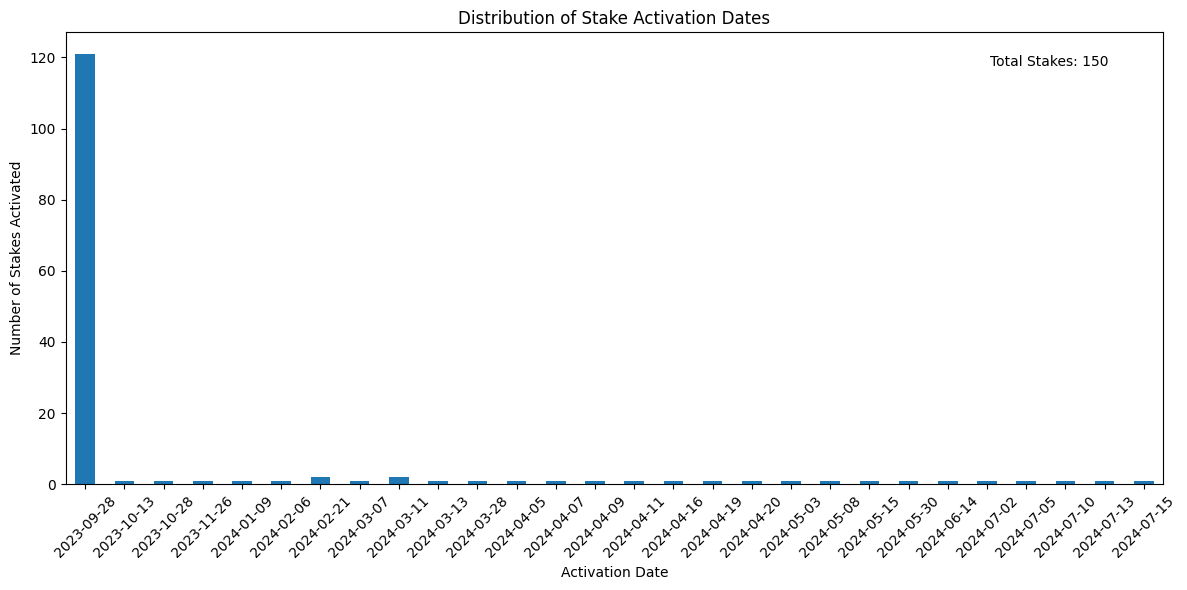

Total number of stakes: 150
Date range: 2023-09-28 to 2024-07-15
Date with most activations: 2023-09-28 (121 activations)


In [21]:
plot_stake_activations((sampled_non_kiln_validators))

When was the flash boys MEV optimizer added?
What was the 

In [228]:
from datetime import datetime, timedelta
sampled_kiln_validators['validator_index'] = sampled_kiln_validators['validator_index'].astype(int)
print(sampled_kiln_validators.shape)
print(sampled_non_kiln_validators.shape)
non_kiln_validator_index_list = sampled_non_kiln_validators['validator_index'].to_list()
kiln_validator_index_list = sampled_kiln_validators['validator_index'].to_list()
rewards_url = kiln_host + "/v1/eth/rewards"
# Headers for API requests
headers = {
    "Authorization": f"Bearer {kiln_api_key}",
    "Content-Type": "application/json"
}

def fetch_rewards_data(url, start_date, headers, validator_indexes):
    result_string = ','.join(str(x) for x in validator_indexes)
    url = url+f"?validator_indexes={result_string}&start_date={start_date}"
    print(url)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data from {url}: {response.status_code}")
        return None
    
start_date =  (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

# Fetch data
non_kiln_validator_rewards = fetch_rewards_data(rewards_url, start_date, headers, non_kiln_validator_index_list)

(150, 28)
(150, 27)
https://api.testnet.kiln.fi/v1/eth/rewards?validator_indexes=816959,862747,1258648,458394,1729218,862990,1601494,1162990,537388,492296,951614,1394455,227472,1621663,1013191,1521727,886680,189348,1554105,1358407,500747,22466,1228369,1397342,1114963,1336811,1695092,234456,1450697,1492402,419473,8361,1618670,633061,783452,774247,4526,1310137,1167305,274338,1327360,681453,126967,1735150,1418254,1115081,1087781,178734,1309306,1739244,1601364,1140323,1350644,1360058,1150400,1647451,278602,1707272,834294,1052410,22169,1009364,469820,1756504,1224857,1702752,696737,600671,1752645,615700,575242,1618507,401278,477027,5229,1094430,1716229,84205,19357,859818,1669482,335765,1221232,116565,344238,280070,1027839,1462134,1439121,985435,666004,620741,1434471,893151,1611097,1401291,1085182,419672,835607,1421965,1747447,575051,492727,1008121,1209852,1151670,1294526,958427,1185110,813999,1629407,871717,811243,254899,591354,38184,1064307,674158,1147027,732893,818803,1654950,1645321,12316

/var/folders/6d/6mt4rsws05l1flxghb9vdlgw0000gn/T/ipykernel_2193/3469462207.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean().round(6)


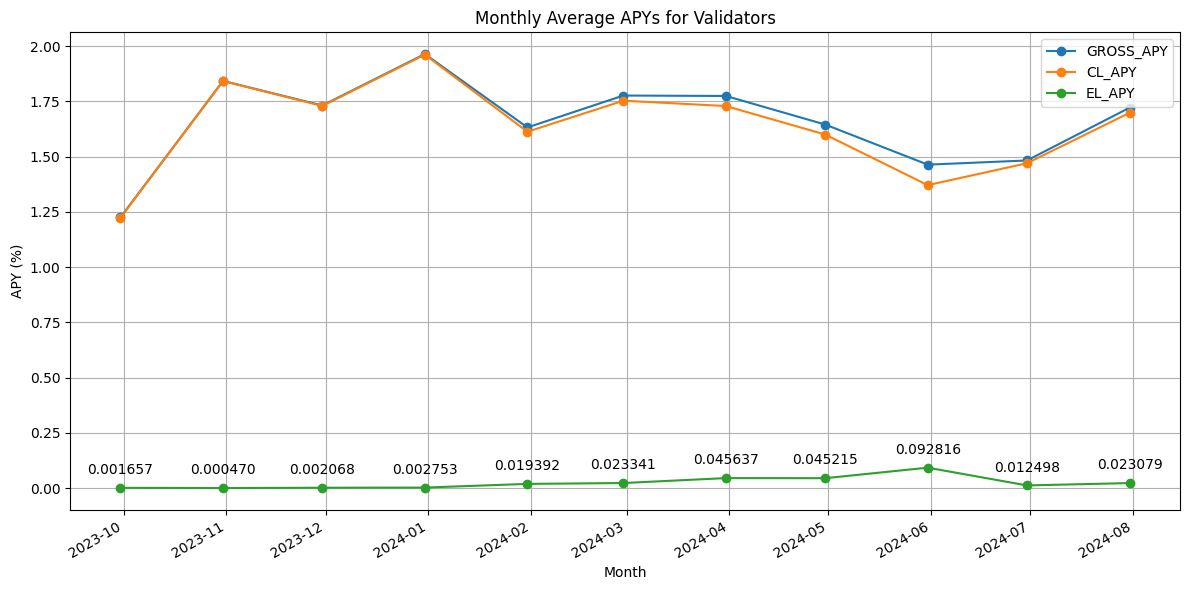

       gross_apy     cl_apy     el_apy
count  11.000000  11.000000  11.000000
mean    1.659797   1.635349   0.024448
std     0.205221   0.212784   0.027914
min     1.225233   1.223576   0.000470
25%     1.557226   1.534948   0.002410
50%     1.721207   1.698128   0.019392
75%     1.775308   1.741016   0.034278
max     1.964024   1.961270   0.092816


In [229]:

def plot_weekly_mean_apy(rewards_payload):

    data_list = rewards_payload['data']
    data_list = data_list
    df = pd.DataFrame(data_list, columns=['date', 'gross_apy', 'cl_apy', 'el_apy'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    """
    This function takes in a dataframe with rewards data and plots the weekly mean values of APY metrics.

    Parameters:
    df (pd.DataFrame): DataFrame containing the rewards data with 'date' column in datetime format.
    """
    monthly_avg = df.resample('M').mean().round(6)
    # Plot the aggregated data
    plt.figure(figsize=(12, 6))
 

    # Plot data with formatted labels
    for column in ['gross_apy', 'cl_apy', 'el_apy']:
        plt.plot(monthly_avg.index, monthly_avg[column], label=f'{column.upper()}', marker='o')


     # Add value labels to each point
    for x, y in zip(monthly_avg.index, monthly_avg[column]):
        plt.annotate(f'{y:.6f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')


    plt.title('Monthly Average APYs for Validators')
    plt.xlabel('Month')
    plt.ylabel('APY (%)')
    plt.legend()
    plt.grid(True)

    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()

    # Use a tight layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print summary statistics with 6 decimal places
    print(monthly_avg.describe().round(6))
plot_weekly_mean_apy(non_kiln_validator_rewards)

https://api.testnet.kiln.fi/v1/eth/rewards?validator_indexes=1637201,1634460,1635359,1638719,1633102,1637890,1638571,1634672,1696533,1635433,1634451,1636082,1638188,1635051,1633754,1635517,1635381,1637829,1639032,1638986,1639232,1696445,1633880,1562935,1638616,1635099,1634573,1632041,1634504,1636579,1635347,1634237,1636210,1692644,1636446,1639048,1638089,1548579,1638410,1639124,1636068,1691734,1638884,1636684,1634356,1638536,1635219,1636517,1637153,1637741,1637622,1637824,1634869,1696407,1639097,1633237,1635463,1635763,1692635,1637280,1633704,1635819,1631797,1635447,1638051,1637840,1636578,1637646,1634668,1639281,1636202,1638841,1637726,1637066,1638417,1636593,1633802,1635844,1702082,1634810,1636532,1636417,1637010,1634731,1636137,1636683,1639329,1637779,1633951,1633784,1635159,1637931,1637648,1638187,1636494,1636242,1633706,1639067,1635274,1636551,1636048,1635350,1636469,1634342,1634542,1638462,1635040,1638329,1636910,1637108,1637190,1637925,1637842,1638481,1634054,1638715,1636027,163

/var/folders/6d/6mt4rsws05l1flxghb9vdlgw0000gn/T/ipykernel_2193/3469462207.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean().round(6)


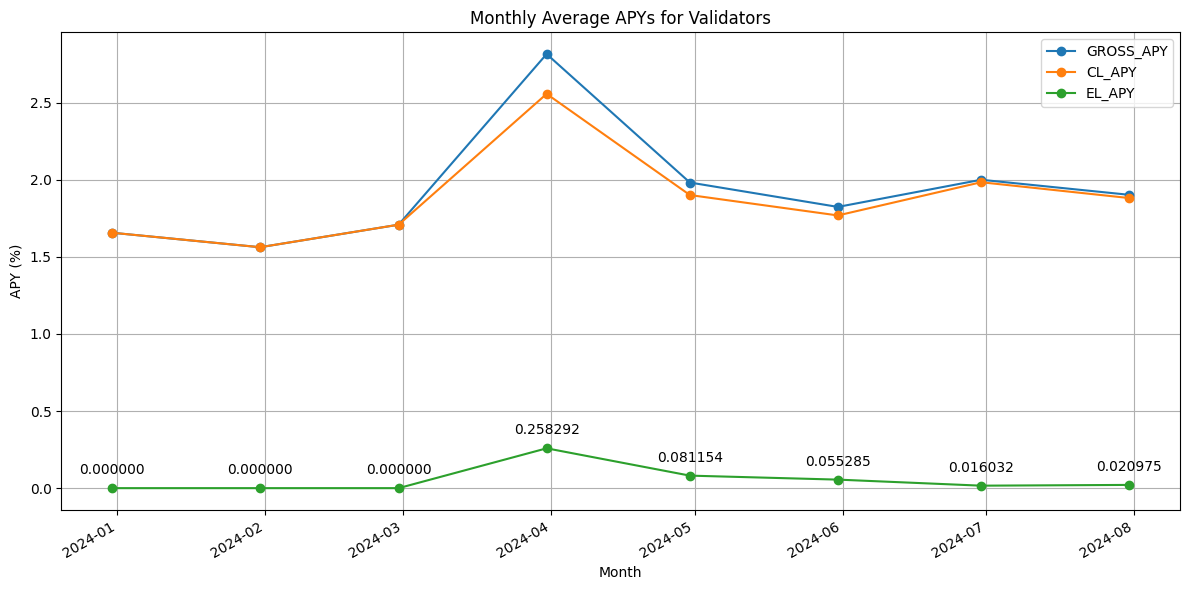

       gross_apy    cl_apy    el_apy
count   8.000000  8.000000  8.000000
mean    1.931391  1.877424  0.053967
std     0.389580  0.307573  0.087631
min     1.562466  1.562466  0.000000
25%     1.695572  1.695572  0.000000
50%     1.863119  1.824988  0.018504
75%     1.986546  1.921673  0.061752
max     2.815351  2.557059  0.258292


In [230]:
kiln_validator_rewards = fetch_rewards_data(rewards_url, start_date, headers, kiln_validator_index_list)
plot_weekly_mean_apy(kiln_validator_rewards)

In [246]:

kiln_host = os.getenv("kiln_host")
def fetch_operations_data(validators_indexes, start_date, end_date, headers, url):
    url= kiln_host + "/v1/eth/operations"
    validators_group_string = ','.join(str(x) for x in validators_indexes)
    url = url+ f"?validator_indexes={validators_group_string}&start_date={start_date}&end_date={end_date}"
    print(url)
    response = requests.get(url, headers=headers)
    return response.json()



start_date = "2024-04-01"
end_date = "2024-06-30"


# Fetch data for Kiln and non-Kiln validators
kiln_validator_operations_data = fetch_operations_data(kiln_validator_index_list, start_date, end_date, headers=headers, url=kiln_host)
non_kiln_data_validator_operations_data = fetch_operations_data(non_kiln_validator_index_list, start_date, end_date, headers=headers, url=kiln_host)
print(kiln_validator_operations_data)

# Process data
def process_data(data):
    df = pd.DataFrame(data['data'])
    df['time'] = pd.to_datetime(df['time'])
    df['amount'] = df['amount'].astype(float) / 1e18  # Convert Wei to ETH
    return df

kiln_ops_df = process_data(kiln_validator_operations_data)
non_kiln_ops_df = process_data(non_kiln_data_validator_operations_data)

# Filter for execution rewards
kiln_exec_rewards = kiln_ops_df[kiln_ops_df['type'] == 'execution_reward']
non_kiln_exec_rewards = non_kiln_ops_df[non_kiln_ops_df['type'] == 'execution_reward']

# Check for MEV payouts
mev_payouts_kiln = kiln_exec_rewards['mev_payout_tx_hash'].notna().sum()
mev_payouts_non_kiln = non_kiln_exec_rewards['mev_payout_tx_hash'].notna().sum()

print(f"MEV payouts for Kiln validators: {mev_payouts_kiln}")
print(f"MEV payouts for non-Kiln validators: {mev_payouts_non_kiln}")

# Visualization 1: Daily execution rewards
plt.figure(figsize=(12, 6))
kiln_daily = kiln_exec_rewards.groupby(kiln_exec_rewards['time'].dt.date)['amount'].sum()
non_kiln_daily = non_kiln_exec_rewards.groupby(non_kiln_exec_rewards['time'].dt.date)['amount'].sum()

plt.plot(kiln_daily.index, kiln_daily.values, label='Kiln Validators')
plt.plot(non_kiln_daily.index, non_kiln_daily.values, label='Non-Kiln Validators')
plt.title('Daily Execution Rewards')
plt.xlabel('Date')
plt.ylabel('Rewards (ETH)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Cumulative execution rewards
plt.figure(figsize=(12, 6))
plt.plot(kiln_daily.index, kiln_daily.cumsum(), label='Kiln Validators')
plt.plot(non_kiln_daily.index, non_kiln_daily.cumsum(), label='Non-Kiln Validators')
plt.title('Cumulative Execution Rewards')
plt.xlabel('Date')
plt.ylabel('Cumulative Rewards (ETH)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate total rewards and average daily rewards
total_kiln = kiln_daily.sum()
total_non_kiln = non_kiln_daily.sum()
avg_daily_kiln = kiln_daily.mean()
avg_daily_non_kiln = non_kiln_daily.mean()

print(f"Total Kiln rewards: {total_kiln:.6f} ETH")
print(f"Total non-Kiln rewards: {total_non_kiln:.6f} ETH")
print(f"Average daily Kiln rewards: {avg_daily_kiln:.6f} ETH")
print(f"Average daily non-Kiln rewards: {avg_daily_non_kiln:.6f} ETH")

https://api.testnet.kiln.fi/v1/eth/operations??validator_indexes=1637201,1634460,1635359,1638719,1633102,1637890,1638571,1634672,1696533,1635433,1634451,1636082,1638188,1635051,1633754,1635517,1635381,1637829,1639032,1638986,1639232,1696445,1633880,1562935,1638616,1635099,1634573,1632041,1634504,1636579,1635347,1634237,1636210,1692644,1636446,1639048,1638089,1548579,1638410,1639124,1636068,1691734,1638884,1636684,1634356,1638536,1635219,1636517,1637153,1637741,1637622,1637824,1634869,1696407,1639097,1633237,1635463,1635763,1692635,1637280,1633704,1635819,1631797,1635447,1638051,1637840,1636578,1637646,1634668,1639281,1636202,1638841,1637726,1637066,1638417,1636593,1633802,1635844,1702082,1634810,1636532,1636417,1637010,1634731,1636137,1636683,1639329,1637779,1633951,1633784,1635159,1637931,1637648,1638187,1636494,1636242,1633706,1639067,1635274,1636551,1636048,1635350,1636469,1634342,1634542,1638462,1635040,1638329,1636910,1637108,1637190,1637925,1637842,1638481,1634054,1638715,1636027

KeyError: 'time'